In [1]:
%matplotlib inline
#https://seaborn.pydata.org/examples/scatterplot_matrix.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
#ファイルを読み込み
video_tsv_merge_data = pd.read_table('./Output/pivot_merge/video_tsv_merge_data.tsv',sep="\t", index_col=None)
video_tsv_merge_data

,video_id,watch_num,comment_num,mylist_num,title,category,upload_time,file_type,length,size_high,size_low
0,sm8896,38882,1292,435,(MAD) [東方] うどんげとてゐ,NaN,1173211747,flv,241,5215313,3737091
1,sm5800,429015,2464,2757,ロベルト・カルロスのフリーキック,スポーツ,1173174475,flv,65,3289769,3242845
2,sm8917,3953,63,13,THE IDOLM@STER アイドルマスター 魔法をかけて by 亜美＠とかち,NaN,1173212678,flv,129,5342052,5294972
3,sm4786,7636,164,19,beatmania RE-ROOTS(A),NaN,1173164796,flv,117,5666433,5580696
4,sm5017,1274,13,0,ビットジェネーレーション デジドライブ,NaN,1173166855,flv,358,12203974,9092032
5,sm1552,10007,349,27,IDOLM@STER アイドルマスター 美希 ショート コミュ ABランク TVリハーサル,NaN,1173138306,flv,172,7882160,7642193
6,sm2467,9521,418,50,[peercast] 佐々木と愉快な仲間たち もう恋なんてしない,NaN,1173146610,flv,271,7469965,7371343
7,sm7747,31762,92,12,斬鉄・・・,NaN,1173193550,flv,14,744634,746153
8,sm7864,362704,7167,5678,大神ＭＡＤ,NaN,1173194895,flv,211,9970129,9593707
9,sm4375,141676,1678,2463,【ＭＡＤ】 アーマードコア ACPV forever 『原罪のレクイエム』,ゲーム,1173160974,flv,240,11419358,11221804


In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [5]:
#項目選択
video_tsv_merge_data_value1 = video_tsv_merge_data.iloc[:,1:4]
#video_tsv_merge_data_value2 = video_tsv_merge_data.iloc[:,8:9]
video_tsv_merge_data_value2 = video_tsv_merge_data.iloc[:,8:11]

#pairplot用のデータフレームを作成
video_tsv_merge_concat = pd.concat([video_tsv_merge_data_value1,video_tsv_merge_data_value2],axis=1)

In [6]:
video_tsv_merge_concat.quantile([0, 0.125, 0.25, 0.5, 0.75, 0.875, 1.0])

,watch_num,comment_num,mylist_num,length,size_high,size_low
0.000,0.0,0.0,0.0,0.0,0.000000e+00,0.0
0.125,56.0,0.0,0.0,116.0,4.912984e+06,608845.0
0.250,136.0,2.0,1.0,206.0,1.231566e+07,5304406.0
0.500,509.0,12.0,2.0,461.0,3.998235e+07,16303083.0
0.750,2059.0,57.0,12.0,1068.0,9.350840e+07,38951855.0
0.875,5860.0,175.0,41.0,1538.0,1.027047e+08,62592120.0
1.000,27973492.0,42954129.0,10011393.0,65535.0,1.572510e+09,950832255.0


In [7]:
#video_watch_num_query = video_tsv_merge_concat.query('56.0 <= watch_num <= 5860.0').watch_num
#video_comment_num_query = video_tsv_merge_concat.query('0.0 <= comment_num <= 175.0').comment_num
#video_mylist_num_query = video_tsv_merge_concat.query('0.0 <= mylist_num <= 41.0').mylist_num
#video_length_query = video_tsv_merge_concat.query('116.0 <= length <= 1538.0').length
#video_size_high_query = video_tsv_merge_concat.query('4912984.0 <= size_high <= 102704700.0').size_high
#video_size_low_query = video_tsv_merge_concat.query('608845 <= size_low <= 62592120').size_low


video_tsv_query_concat= video_tsv_merge_concat.query('56.0 <= watch_num <= 5860.0 & 0.0 <= comment_num <= 175.0 & 0.0 <= mylist_num <= 41.0 & 116.0 <= length <= 1538.0 & 4912984.0 <= size_high <= 102704700.0 & 608845.0 <= size_low <= 62592120.0' )

In [8]:
video_tsv_query_concat

,watch_num,comment_num,mylist_num,length,size_high,size_low
2,3953,63,13,129,5342052,5294972
4,1274,13,0,358,12203974,9092032
15,5633,116,8,194,9398532,9071713
18,5640,79,27,141,6790770,6484432
25,3629,56,16,170,6794123,6524715
41,5159,27,24,136,14943254,7287336
84,1848,93,1,194,9272154,8814173
95,1374,6,5,555,21335785,18911561
156,4592,59,15,131,6263771,6170063
182,1352,10,1,177,5949231,5255653


In [9]:
#pairplot用のデータフレームを作成
#video_tsv_query_concat = pd.concat([video_watch_num_query,video_comment_num_query,video_mylist_num_query,
#                                    video_length_query,video_size_high_query,video_size_low_query],axis=1)

In [10]:
video_tsv_query_concat = video_tsv_query_concat.sample(n=100000,random_state=10)
video_tsv_query_concat

,watch_num,comment_num,mylist_num,length,size_high,size_low
5116732,501,11,2,980,95563797,52758397
3090546,64,0,0,132,9936683,7112230
483782,2197,74,13,362,45072688,19710238
1324007,144,1,3,603,82466242,31375581
9033632,1017,18,2,524,31171741,5903253
2574065,516,41,1,589,41043619,31263992
9478052,154,2,2,972,99358311,51684383
14639520,2137,67,5,508,63704230,27106394
13518708,75,0,5,475,24826609,10762238
14471479,886,3,31,139,30604682,7525590


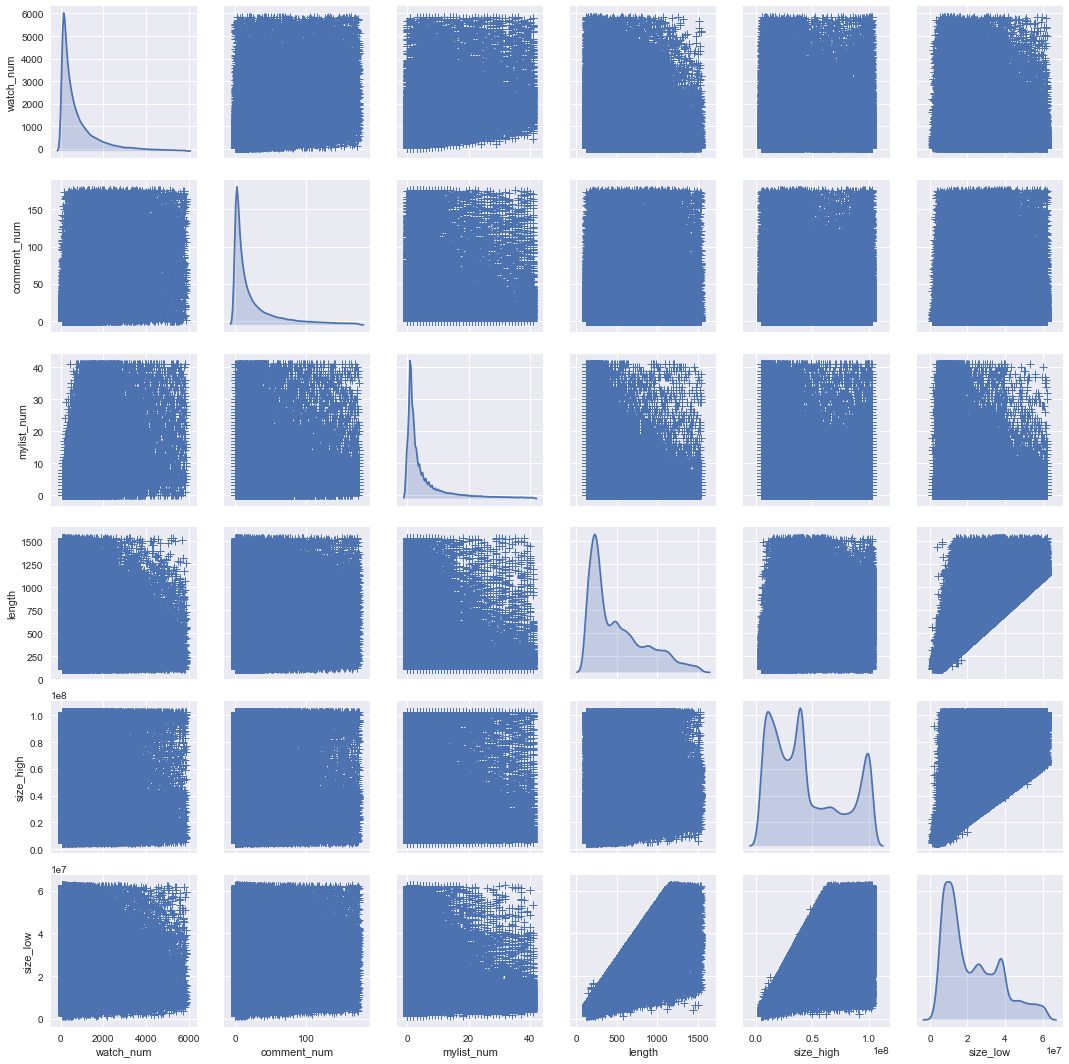

In [11]:
#Normalized
sns.pairplot(video_tsv_query_concat,diag_kind="kde", markers="+",
            plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))

#plt.savefig
plt.savefig('./Output/pairplot_query_concat_histgram.png')

In [12]:
#1.MinMaxScaler（広がりを補正、非負値化）
scaler = MinMaxScaler()
scaler.fit(video_tsv_query_concat)
video_tsv_query_concat_scaled = scaler.transform(video_tsv_query_concat)

#2.L1正則化（制約補正）
video_tsv_query_concat_normalized = preprocessing.normalize(video_tsv_query_concat_scaled, norm='l1')

#normalized
video_query_normalized = pd.DataFrame(video_tsv_query_concat_normalized,columns=video_tsv_merge_concat.columns)

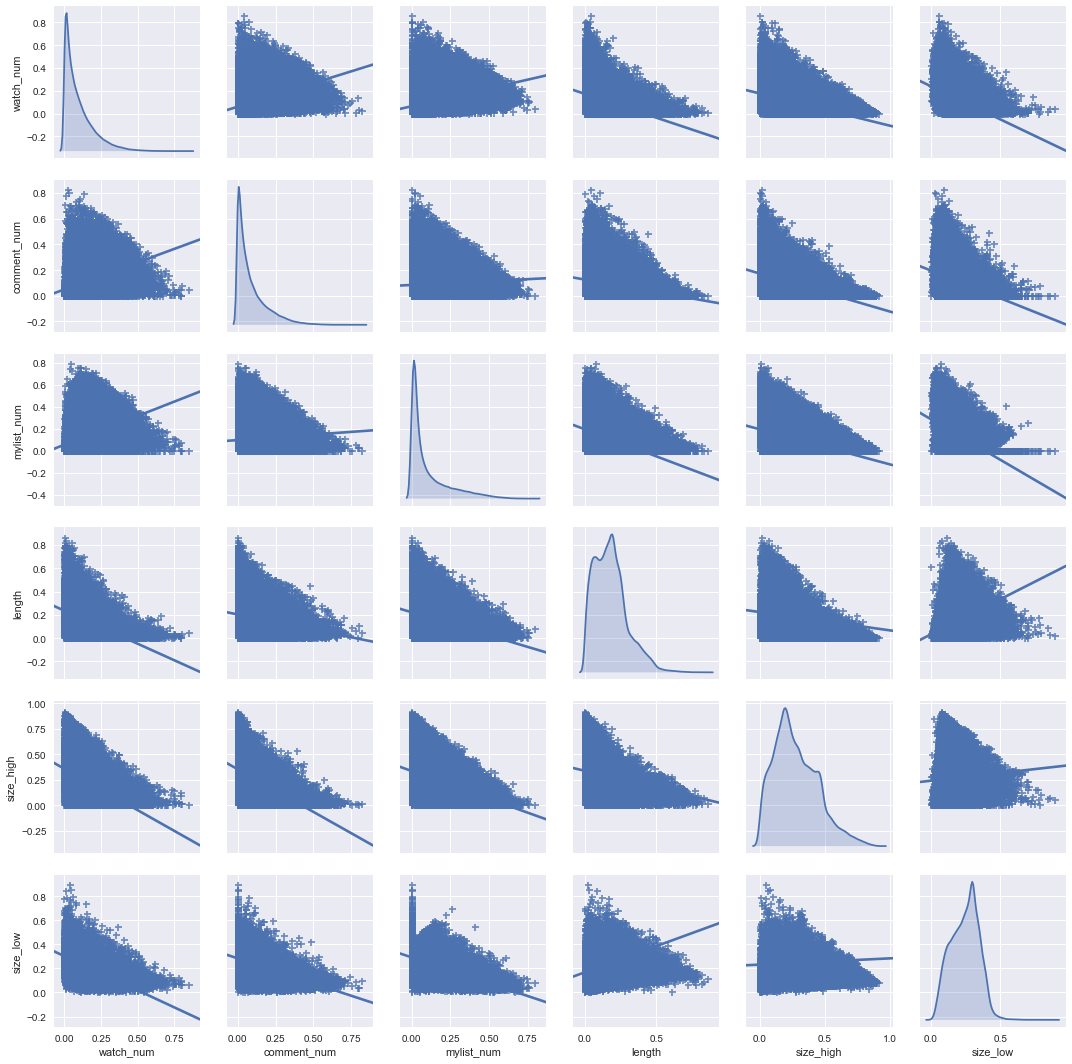

In [13]:
#pairplot
#Normalized
sns.pairplot(video_query_normalized,diag_kind="kde", markers="+", kind="reg",diag_kws=dict(shade=True))

#plt.savefig
plt.savefig('./Output/pairplot_query_concat_histgram_normalized.png')

In [14]:
video_tsv_query_concat.to_csv('./Output/SVR_Score_video_tsv_query.tsv', sep='\t')